In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from math import log, exp, sqrt, cos, sin
from numpy.linalg import norm

In [182]:
def plot_graphic(x_arr, t_arr):
    plt.figure(figsize=(10, 5))
    plt.plot(t_arr[0], x_arr[0], label='h = 0.1')
    plt.plot(t_arr[1], x_arr[1], label='h = 0.01')
    plt.plot(t_arr[2], x_arr[2], label='h = 0.001')

    # Добавление заголовков и подписей осей
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('График x(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [280]:
def plot_ksi(ksi, time):
    # Построение графика
    plt.figure(figsize=(5, 3))
    # График abs_arr[0] от t_arr[0]
    plt.plot(time[0], ksi[0], label='h = 0.1')
    # График abs_arr[1] от t_arr[1]
    plt.plot(time[1], ksi[1], label='h = 0.01')
    # График abs_arr[2] от t_arr[2]
    plt.plot(time[2], ksi[2], label='h = 0.001')
    
    plt.xlabel('t')
    plt.ylabel('ξ(t)')
    plt.title('График ξ(t)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

In [286]:
def plot_lg_ksi(ksi, time):
    # Построение графика
    plt.figure(figsize=(5, 3))
    # График abs_arr[0] от t_arr[0]
    plt.plot(time[0], ksi[0], label='h = 0.1')
    # График abs_arr[1] от t_arr[1]
    plt.plot(time[1], ksi[1], label='h = 0.01')
    # График abs_arr[2] от t_arr[2]
    plt.plot(time[2], ksi[2], label='h = 0.001')
    
    plt.xlabel('t')
    plt.ylabel('lgξ(t)')
    plt.title('График lgξ(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [240]:
def calculate_ksi(func_true_decision, solution, time):
    ksi_n = [[] for _ in range(3)]
    lg_ksi_n = [[] for _ in range(3)]
    time_lg_arr = [[] for _ in range(3)]
    
    ksi_n = [[] for _ in range(3)]
    lg_ksi_n = [[] for _ in range(3)]

    if len(solution[0][0]) == 1:
        x1_true_arr = []
        x2_true_arr = []
        x3_true_arr = []

        for i, t in enumerate(time[0]):
            x_true_tmp = func_true_decision(t, u0[0])
            ksi_n[0].append((x_true_tmp - solution[0][i][0]) * (x_true_tmp - solution[0][i][0]))
        for i, t in enumerate(time[1]):
            x_true_tmp = func_true_decision(t, u0[0])
            ksi_n[1].append((x_true_tmp - solution[1][i][0]) * (x_true_tmp - solution[1][i][0]))
        for i, t in enumerate(time[2]):
            x_true_tmp = func_true_decision(t, u0[0])
            ksi_n[2].append((x_true_tmp - solution[2][i][0]) * (x_true_tmp - solution[2][i][0]))

        lg_ksi_n[0] = np.log(ksi_n[0])
        lg_ksi_n[1] = np.log(ksi_n[1])
        lg_ksi_n[2] = np.log(ksi_n[2])
    else:
        if len(solution[0][0]) == 2:
            x1_true_arr, y1_true_arr = [], []
            x2_true_arr, y2_true_arr = [], []
            x3_true_arr, y3_true_arr = [], []

            for i, t in enumerate(time[0]):
                x_true_tmp, y_true_tmp = func_true_decision(t, u0[0], u0[1])
                ksi_n[0].append((x_true_tmp - solution[0][i][0]) * (x_true_tmp - solution[0][i][0]) + (y_true_tmp - solution[0][i][1]) * (y_true_tmp - solution[0][i][1]))
            for i, t in enumerate(time[1]):
                x_true_tmp, y_true_tmp = func_true_decision(t, u0[0], u0[1])
                ksi_n[1].append((x_true_tmp - solution[1][i][0]) * (x_true_tmp - solution[1][i][0]) + (y_true_tmp - solution[1][i][1]) * (y_true_tmp - solution[1][i][1]))
            for i, t in enumerate(time[2]):
                x_true_tmp, y_true_tmp = func_true_decision(t, u0[0], u0[1])
                ksi_n[2].append((x_true_tmp - solution[2][i][0]) * (x_true_tmp - solution[2][i][0]) + (y_true_tmp - solution[2][i][1]) * (y_true_tmp - solution[2][i][1]))
        
            lg_ksi_n[0] = np.log(ksi_n[0])
            lg_ksi_n[1] = np.log(ksi_n[1])
            lg_ksi_n[2] = np.log(ksi_n[2])  
        else: 
            if(len(solution[0][0]) == 3): 
                print("s")
        
    return [ksi_n, lg_ksi_n]

# РЕШЕНИЕ

In [152]:
h_arr = [0.1, 0.01, 0.001]
T = 100

In [87]:
def x1_analytical(t, x0):
    return x0 * np.exp(-t)

def x2_analytical(t, x0):
    return x0 * np.exp(-t)

def x3_analytical(t, x0, y0):
     return np.array([x0 * np.cos(t) + y0 * np.sin(t), y0 * np.cos(t) - x0 * np.sin(t)])

In [180]:
def f1(t, point):
    x = point
    dxdt = -x
    return dxdt

def f2(t, point):
    x = point
    dxdt = x
    return dxdt

def f3(t, point):
    x, y = point
    dxdt = y
    dydt = -x 
    return np.array([dxdt, dydt])

def f4(t, point):
    x, y, z = point
    dxdt = -y - z
    dydt = x + 0.2 * y
    dzdt = 0.2 + z * (x - 5.7)
    return np.array([dxdt, dydt, dzdt])

In [59]:
def Euler(f, t0, initital_point, h,Т):
    time = t0
    u = u0
    results = [u]
    t = [time]
    
    while t[-1] < T:
        u = u + h * f(t, u)
        time = time + h
        
        results.append(u)
        t.append(time)
    
    return np.array(results), np.array(t)

In [60]:
def RK4(f, t0, initital_point, h, T):
    time = t0
    u = u0
    results = [u]
    t = [time]
    
    while t[-1] < T:
        k1 = h * f(time, u)
        k2 = h * f(time + h/2, u + k1/2)
        k3 = h * f(time + h/2, u + k2/2)
        k4 = h * f(time + h, u + k3)
        
        u = u + (k1 + 2*k2 + 2*k3 + k4) / 6
        time = time + h
        
        results.append(u)
        t.append(time)
    
    return np.array(results), np.array(t)

## x` = -x

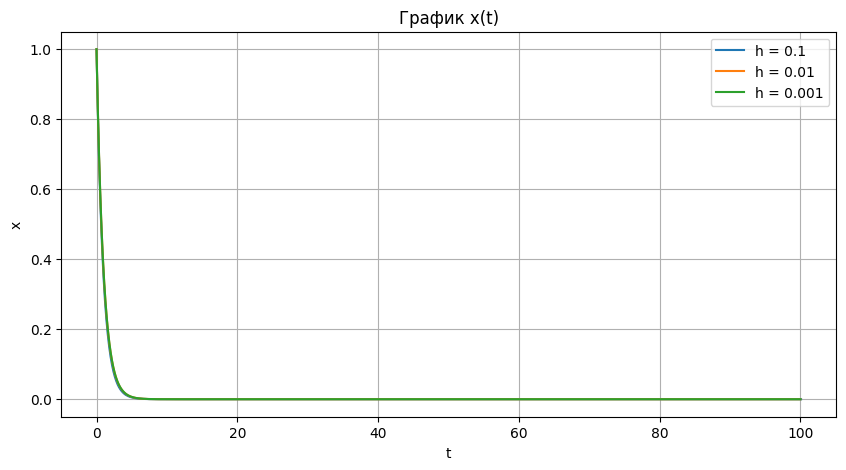

In [183]:
# Начальные условия
t0 = 0
u0 = np.array([1])
solution = [[] for _ in range(3)]
time = [[] for _ in range(3)]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = Euler(f1, t0, u0, h_arr[0], T)
solution[1], time[1] = Euler(f1, t0, u0, h_arr[1], T)
solution[2], time[2] = Euler(f1, t0, u0, h_arr[2], T)

plot_graphic(solution, time)

In [184]:
ksi_n, lg_ksi_n = calculate_ksi(x1_analytical, solution, time)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:25: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:26: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:27: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


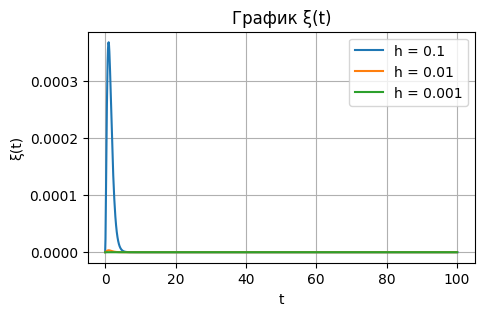

In [185]:
plot_ksi(ksi_n, time)

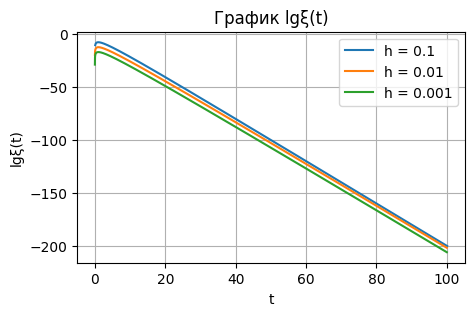

In [186]:
plot_lg_ksi(lg_ksi_n, time)

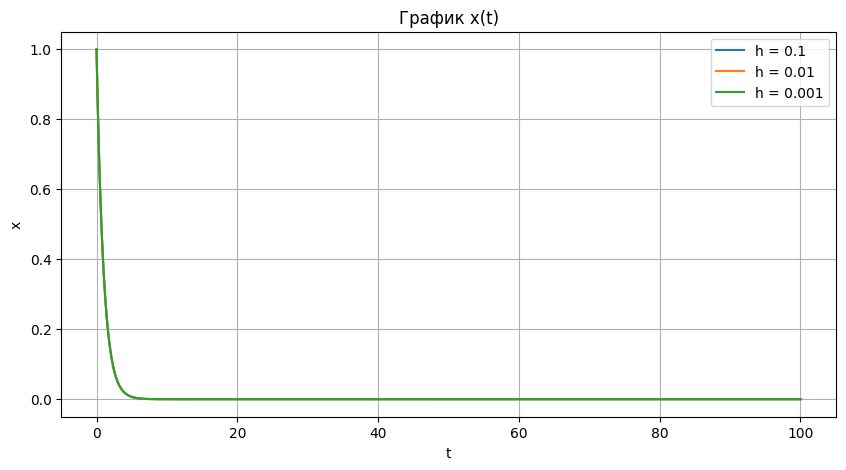

In [187]:
# Начальные условия
t0 = 0
u0 = np.array([1])
solution = [[] for _ in range(3)]
time = [[] for _ in range(3)]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = RK4(f1, t0, u0, h_arr[0], T)
solution[1], time[1] = RK4(f1, t0, u0, h_arr[1], T)
solution[2], time[2] = RK4(f1, t0, u0, h_arr[2], T)

plot_graphic(solution, time)

In [188]:
ksi_n, lg_ksi_n = calculate_ksi(x1_analytical, solution, time)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:25: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:26: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:27: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


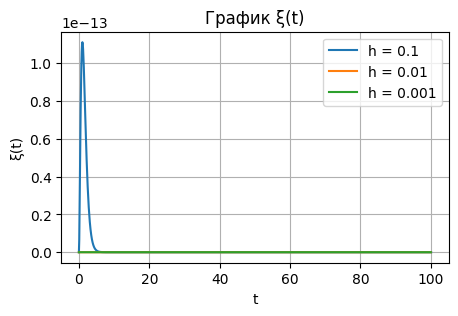

In [189]:
plot_ksi(ksi_n, time)

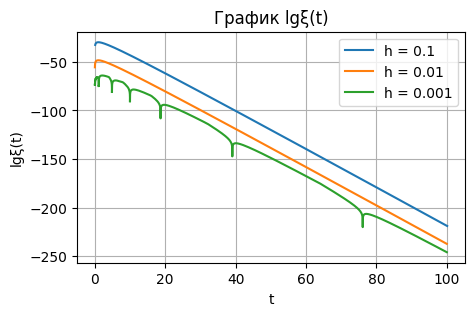

In [190]:
plot_lg_ksi(lg_ksi_n, time)

## x` = x

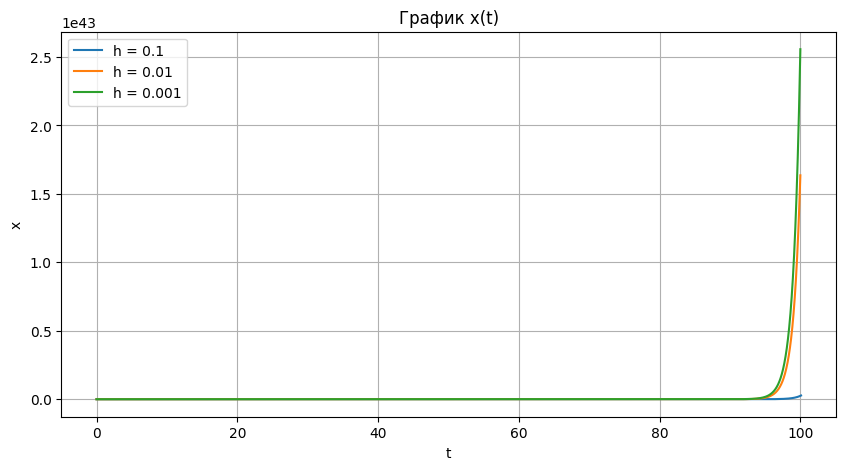

In [191]:
# Начальные условия
t0 = 0
u0 = np.array([1])
solution = [[] for _ in range(3)]
time = [[] for _ in range(3)]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = Euler(f2, t0, u0, h_arr[0], T)
solution[1], time[1] = Euler(f2, t0, u0, h_arr[1], T)
solution[2], time[2] = Euler(f2, t0, u0, h_arr[2], T)

plot_graphic(solution, time)

In [192]:
ksi_n, lg_ksi_n = calculate_ksi(x1_analytical, solution, time)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:25: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:26: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:27: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


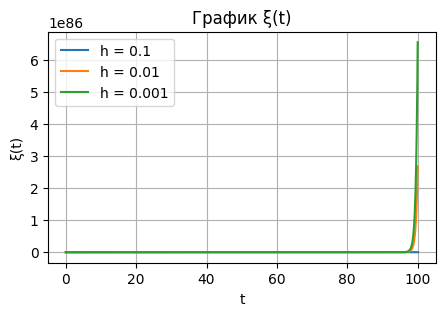

In [193]:
plot_ksi(ksi_n, time)

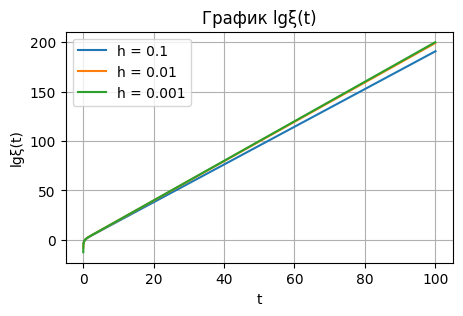

In [194]:
plot_lg_ksi(lg_ksi_n, time)

In [199]:
# Начальные условия
t0 = 0
u0 = np.array([1])
solution = [[] for _ in range(3)]
time = [[] for _ in range(3)]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = RK4(f2, t0, u0, h_arr[0], T)
solution[1], time[1] = RK4(f2, t0, u0, h_arr[1], T)
solution[2], time[2] = RK4(f2, t0, u0, h_arr[2], T)

In [196]:
ksi_n, lg_ksi_n = calculate_ksi(x1_analytical, solution, time)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:25: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:26: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\325821281.py:27: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


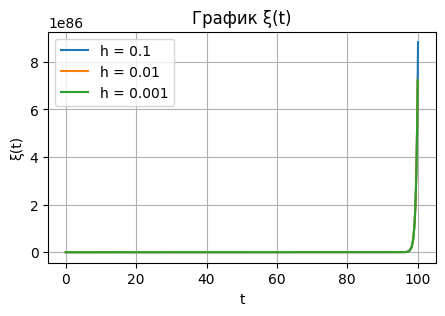

In [197]:
plot_ksi(ksi_n, time)

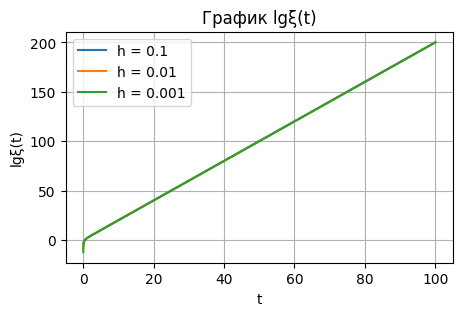

In [198]:
plot_lg_ksi(lg_ksi_n, time)

## x`` + x = 0

In [235]:
# Начальные условия
t0 = 0
u0 = np.array([1, 1])

solution = [[] for _ in range(3)]
time = [[] for _ in range(3)]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = Euler(f3, t0, u0, h_arr[0], T)
solution[1], time[1] = Euler(f3, t0, u0, h_arr[1], T)
solution[2], time[2] = Euler(f3, t0, u0, h_arr[2], T)

In [236]:
ksi_n, lg_ksi_n = calculate_ksi(x3_analytical, solution, time)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\3712847860.py:43: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\3712847860.py:44: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\3712847860.py:45: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


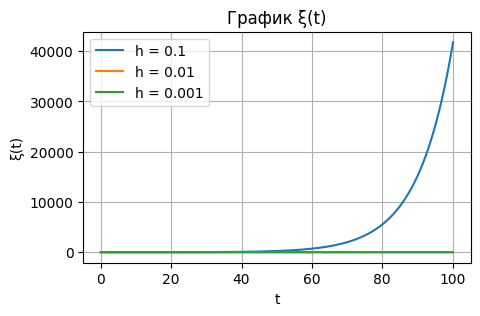

In [237]:
plot_ksi(ksi_n, time)

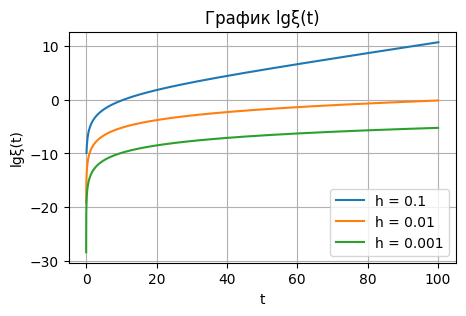

In [238]:
plot_lg_ksi(lg_ksi_n, time)

In [200]:
# Начальные условия
t0 = 0
u0 = np.array([1, 1])

solution = [[] for _ in range(3)]
time = [[] for _ in range(3)]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = RK4(f3, t0, u0, h_arr[0], T)
solution[1], time[1] = RK4(f3, t0, u0, h_arr[1], T)
solution[2], time[2] = RK4(f3, t0, u0, h_arr[2], T)

In [233]:
ksi_n, lg_ksi_n = calculate_ksi(x3_analytical, solution, time)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\3712847860.py:43: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[0] = np.log(ksi_n[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\3712847860.py:44: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[1] = np.log(ksi_n[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\3712847860.py:45: RuntimeWarning: divide by zero encountered in log
  lg_ksi_n[2] = np.log(ksi_n[2])


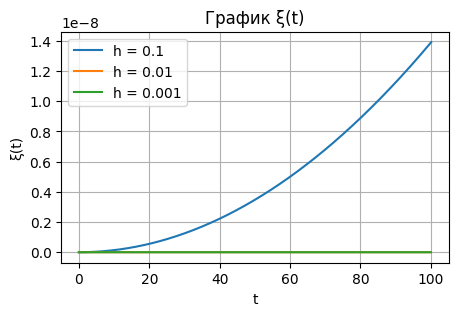

In [226]:
plot_ksi(ksi_n, time)

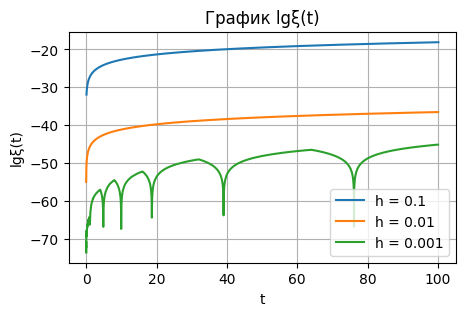

In [234]:
plot_lg_ksi(lg_ksi_n, time)

### Rausel

In [290]:
# Начальные условия
t0 = 0
u0 = np.array([1, 1, 1])

solution = [[] for _ in range(3)]
solution_half = [[] for _ in range(3)]

time = [[] for _ in range(3)]
time_half = [[] for _ in range(3)]

h_half_arr = [h_arr[0]/2, h_arr[1]/2, h_arr[2]/2]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = Euler(f4, t0, u0, h_arr[0], T)
solution[1], time[1] = Euler(f4, t0, u0, h_arr[1], T)
solution[2], time[2] = Euler(f4, t0, u0, h_arr[2], T)

# Решение системы методом Рунге-Кутта 4-го порядка
solution_half[0], time_half[0] = Euler(f4, t0, u0, h_half_arr[0], T)
solution_half[1], time_half[1] = Euler(f4, t0, u0, h_half_arr[1], T)
solution_half[2], time_half[2] = Euler(f4, t0, u0, h_half_arr[2], T)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\1455350280.py:21: RuntimeWarning: overflow encountered in scalar multiply
  dzdt = 0.2 + z * (x - 5.7)
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\1537333010.py:8: RuntimeWarning: invalid value encountered in add
  u = u + h * f(t, u)


In [291]:
ksi, lg_ksi, time1 =  [[] for _ in range(3)], [[] for _ in range(3)], [[] for _ in range(3)]

for i in range(len(time[0]) - 1):
    diff_x = (solution[0][i][0] - solution_half[0][2 * i][0]) * (solution[0][i][0] - solution_half[0][2 * i][0])
    diff_y = (solution[0][i][1] - solution_half[0][2 * i][1]) * (solution[0][i][1] - solution_half[0][2 * i][1])
    diff_z = (solution[0][i][2] - solution_half[0][2 * i][2]) * (solution[0][i][2] - solution_half[0][2 * i][2])
    ksi[0].append(diff_x + diff_y + diff_z)
    time1[0].append(time[0][i])

for i in range(len(time[1])):
    diff_x = (solution[1][i][0] - solution_half[1][2 * i][0]) * (solution[1][i][0] - solution_half[1][2 * i][0])
    diff_y = (solution[1][i][1] - solution_half[1][2 * i][1]) * (solution[1][i][1] - solution_half[1][2 * i][1])
    diff_z = (solution[1][i][2] - solution_half[1][2 * i][2]) * (solution[1][i][2] - solution_half[1][2 * i][2])
    ksi[1].append(diff_x + diff_y + diff_z)
    time1[1].append(time[1][i])
    
for i in range(len(time[2])):
    diff_x = (solution[2][i][0] - solution_half[2][2 * i][0]) * (solution[2][i][0] - solution_half[2][2 * i][0])
    diff_y = (solution[2][i][1] - solution_half[2][2 * i][1]) * (solution[2][i][1] - solution_half[2][2 * i][1])
    diff_z = (solution[2][i][2] - solution_half[2][2 * i][2]) * (solution[2][i][2] - solution_half[2][2 * i][2])
    ksi[2].append(diff_x + diff_y + diff_z)
    time1[2].append(time[2][i])
    
lg_ksi[0] = np.log(ksi[0])
lg_ksi[1] = np.log(ksi[1])
lg_ksi[2] = np.log(ksi[2])  

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:6: RuntimeWarning: overflow encountered in scalar multiply
  diff_z = (solution[0][i][2] - solution_half[0][2 * i][2]) * (solution[0][i][2] - solution_half[0][2 * i][2])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:4: RuntimeWarning: overflow encountered in scalar multiply
  diff_x = (solution[0][i][0] - solution_half[0][2 * i][0]) * (solution[0][i][0] - solution_half[0][2 * i][0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:5: RuntimeWarning: overflow encountered in scalar multiply
  diff_y = (solution[0][i][1] - solution_half[0][2 * i][1]) * (solution[0][i][1] - solution_half[0][2 * i][1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:24: RuntimeWarning: divide by zero encountered in log
  lg_ksi[0] = np.log(ksi[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:25: RuntimeWarning: divide by zero encountered in log
  lg_ksi[1] = np.log(ksi[1])

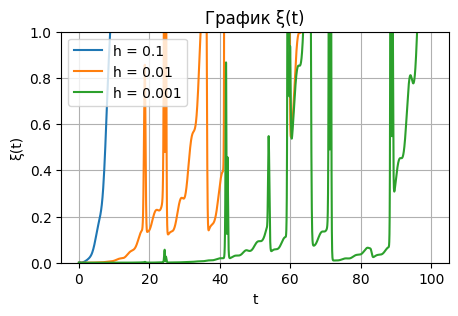

In [292]:
plot_ksi(ksi, time1)

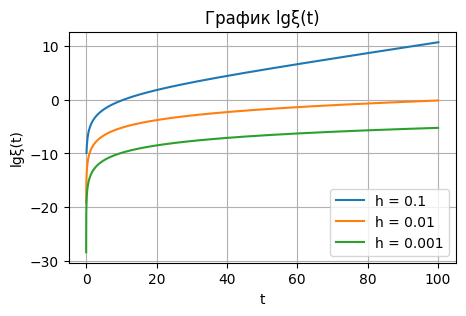

In [293]:
plot_lg_ksi(lg_ksi_n, time)

In [257]:
# Начальные условия
t0 = 0
u0 = np.array([1, 1, 1])

solution = [[] for _ in range(3)]
solution_half = [[] for _ in range(3)]

time = [[] for _ in range(3)]
time_half = [[] for _ in range(3)]

h_half_arr = [h_arr[0]/2, h_arr[1]/2, h_arr[2]/2]

# Решение системы методом Рунге-Кутта 4-го порядка
solution[0], time[0] = RK4(f4, t0, u0, h_arr[0], T)
solution[1], time[1] = RK4(f4, t0, u0, h_arr[1], T)
solution[2], time[2] = RK4(f4, t0, u0, h_arr[2], T)

# Решение системы методом Рунге-Кутта 4-го порядка
solution_half[0], time_half[0] = RK4(f4, t0, u0, h_half_arr[0], T)
solution_half[1], time_half[1] = RK4(f4, t0, u0, h_half_arr[1], T)
solution_half[2], time_half[2] = RK4(f4, t0, u0, h_half_arr[2], T)

In [273]:
ksi, lg_ksi, time1 =  [[] for _ in range(3)], [[] for _ in range(3)], [[] for _ in range(3)]

for i in range(len(time[0]) - 1):
    diff_x = (solution[0][i][0] - solution_half[0][2 * i][0]) * (solution[0][i][0] - solution_half[0][2 * i][0])
    diff_y = (solution[0][i][1] - solution_half[0][2 * i][1]) * (solution[0][i][1] - solution_half[0][2 * i][1])
    diff_z = (solution[0][i][2] - solution_half[0][2 * i][2]) * (solution[0][i][2] - solution_half[0][2 * i][2])
    ksi[0].append(diff_x + diff_y + diff_z)
    time1[0].append(time[0][i])

for i in range(len(time[1])):
    diff_x = (solution[1][i][0] - solution_half[1][2 * i][0]) * (solution[1][i][0] - solution_half[1][2 * i][0])
    diff_y = (solution[1][i][1] - solution_half[1][2 * i][1]) * (solution[1][i][1] - solution_half[1][2 * i][1])
    diff_z = (solution[1][i][2] - solution_half[1][2 * i][2]) * (solution[1][i][2] - solution_half[1][2 * i][2])
    ksi[1].append(diff_x + diff_y + diff_z)
    time1[1].append(time[1][i])
    
for i in range(len(time[2])):
    diff_x = (solution[2][i][0] - solution_half[2][2 * i][0]) * (solution[2][i][0] - solution_half[2][2 * i][0])
    diff_y = (solution[2][i][1] - solution_half[2][2 * i][1]) * (solution[2][i][1] - solution_half[2][2 * i][1])
    diff_z = (solution[2][i][2] - solution_half[2][2 * i][2]) * (solution[2][i][2] - solution_half[2][2 * i][2])
    ksi[2].append(diff_x + diff_y + diff_z)
    time1[2].append(time[2][i])
    
lg_ksi[0] = np.log(ksi[0])
lg_ksi[1] = np.log(ksi[1])
lg_ksi[2] = np.log(ksi[2])  

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:24: RuntimeWarning: divide by zero encountered in log
  lg_ksi[0] = np.log(ksi[0])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:25: RuntimeWarning: divide by zero encountered in log
  lg_ksi[1] = np.log(ksi[1])
C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_12036\451166145.py:26: RuntimeWarning: divide by zero encountered in log
  lg_ksi[2] = np.log(ksi[2])


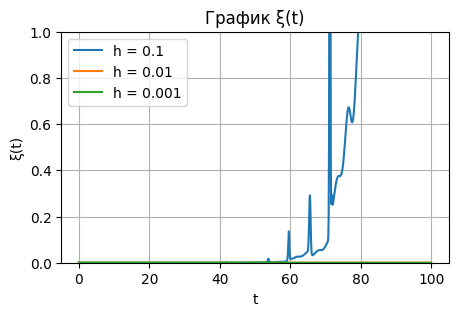

In [287]:
plot_ksi(ksi, time1)

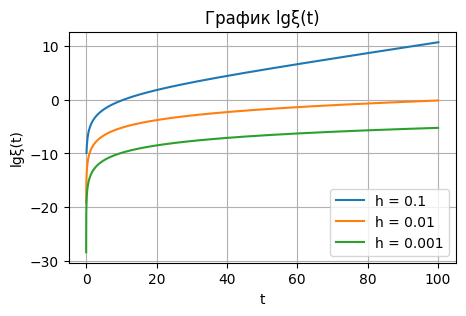

In [288]:
plot_lg_ksi(lg_ksi_n, time)

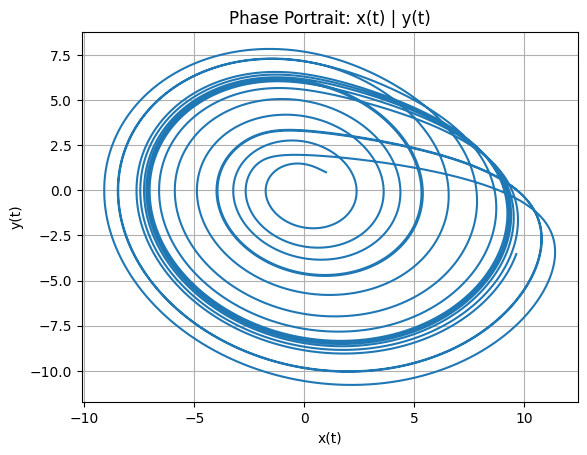

In [255]:
# Извлечение x(t) и y(t) для построения графика
x_values = solution[2][:, 0]
y_values = solution[2][:, 1]
z_values = solution[2][:, 2]

# Построение графика x(t) от y(t)
plt.figure()
plt.plot(x_values, y_values)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Phase Portrait: x(t) | y(t)')
plt.grid()
plt.show()

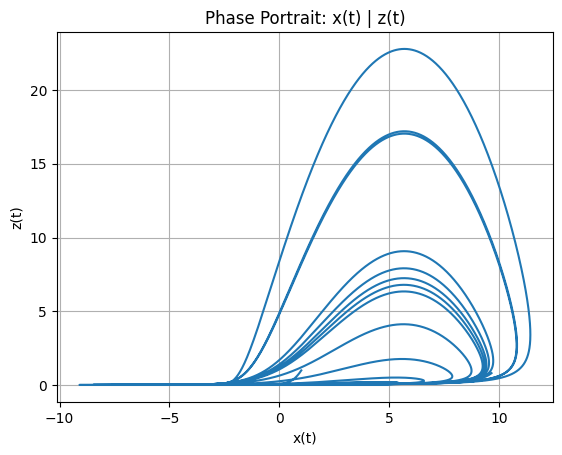

In [256]:
# Построение графика x(t) от y(t)
plt.figure()
plt.plot(x_values, z_values)
plt.xlabel('x(t)')
plt.ylabel('z(t)')
plt.title('Phase Portrait: x(t) | z(t)')
plt.grid()
plt.show()